In [1]:
%matplotlib inline
from collections import OrderedDict
import itertools
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotting as mplt
import seaborn as sns
import sys

pkg_dir = '/home/mrossol/reV2'
sys.path.append(pkg_dir)
from reV.rpm.rpm_clusters import RPMClusters, ClusteringMethods
from reV.rpm.rpm_manager import RPMClusterManager as rcm

# Plotting settings
sns.set_style("white")
sns.set_style("ticks")
mpl.rcParams['font.sans-serif'] = 'DejaVu Sans'
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
fname = '/lustre/eaglefs/projects/naris/extreme_events/generation/pv_ca_2012.h5'
with h5py.File(fname, 'r') as f:
    solar_meta = pd.DataFrame(f['meta'][...])
    solar_gids = solar_meta.index.values

fname = '/lustre/eaglefs/projects/naris/extreme_events/generation/v90_full_ca_2012.h5'
with h5py.File(fname, 'r') as f:
    wind_meta = pd.DataFrame(f['meta'][...])
    wind_gids = wind_meta.iloc[::15].index.values

# California

In [3]:
clusters = RPMClusters('/lustre/eaglefs/projects/naris/extreme_events/generation/v90_full_ca_2012.h5',
                       wind_gids, n_clusters=6)

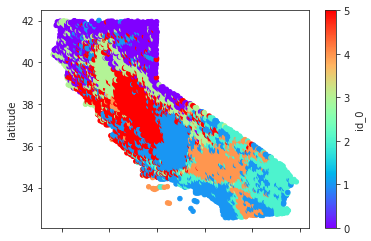

In [4]:
labels = clusters._cluster_coefficients()
clusters.meta['cluster_id'] = labels
clusters.meta['id_0'] = labels
clusters.meta.plot.scatter(x='longitude', y='latitude', c='id_0', cmap='rainbow')
plt.show()

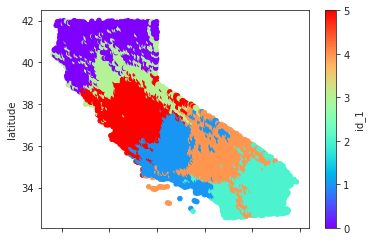

In [5]:
new_labels = clusters._dist_rank_filter()
clusters.meta['cluster_id'] = new_labels
clusters.meta['id_1'] = new_labels
clusters.meta.plot.scatter(x='longitude', y='latitude', c='id_1', cmap='rainbow')
plt.show()

In [6]:
new_labels = clusters._contiguous_filter(buffer_weight=1)
clusters.meta['cluster_id'] = new_labels
clusters.meta['id_2'] = new_labels
clusters.meta.plot.scatter(x='longitude', y='latitude', c='id_2', cmap='rainbow')
plt.show()

IndexError: list index out of range

RTreeError: Error in "Index_CreateWithStream": IllegalArgumentException: RTree::BulkLoader::bulkLoadUsingSTR: Empty data stream given.

# Manager Dev

In [2]:
cf_path = '/projects/rev/dev/rpm/data/v90_full_2012.h5'
rpm_meta = '/projects/rev/dev/rpm/rpm_meta_wind_small_test.csv'
rpm_meta = pd.read_csv(rpm_meta)
rpm = rcm(cf_path, rpm_meta, rpm_region_col='ba')

In [3]:
rpm._rpm_regions

{'PACE_UT': {'cluster_num': 2,
  'gen_gids': array([271033, 271990, 271991, ..., 510295, 510296, 510297]),
  'gids': array([467060, 468017, 468018, ..., 706322, 706323, 706324])},
 'PACE_WY': {'cluster_num': 3,
  'gen_gids': array([434706, 434707, 434708, ..., 803990, 803991, 803992]),
  'gids': array([ 630733,  630734,  630735, ..., 1000017, 1000018, 1000019])}}

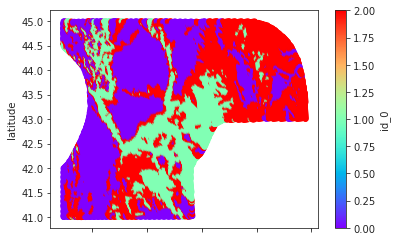

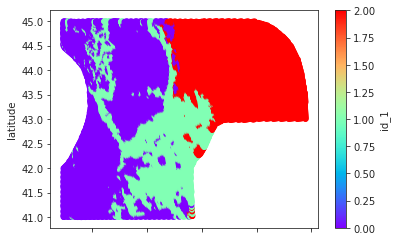

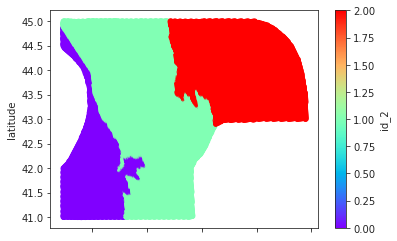

In [4]:
region = rpm._rpm_regions['PACE_WY']

clusters = RPMClusters(cf_path, region['gen_gids'],
                       n_clusters=region['cluster_num'])

labels = clusters._cluster_coefficients()
clusters.meta['cluster_id'] = labels
clusters.meta['id_0'] = labels
clusters.meta.plot.scatter(x='longitude', y='latitude', c='id_0', cmap='rainbow')
plt.show()

new_labels = clusters._dist_rank_filter()
clusters.meta['cluster_id'] = new_labels
clusters.meta['id_1'] = new_labels
clusters.meta.plot.scatter(x='longitude', y='latitude', c='id_1', cmap='rainbow')
plt.show()

new_labels = clusters._contiguous_filter(buffer_weight=2)
clusters.meta['id_2'] = new_labels
clusters.meta.plot.scatter(x='longitude', y='latitude', c='id_2', cmap='rainbow')
plt.show()

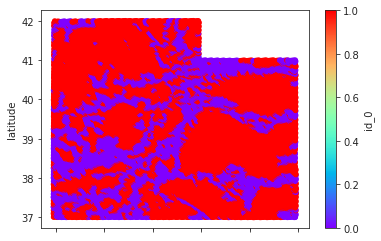

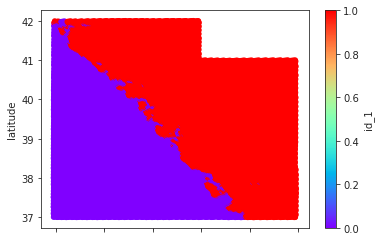

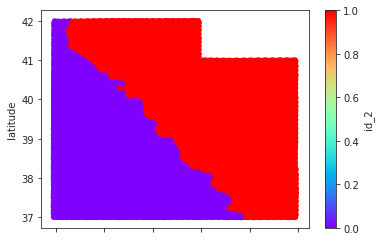

In [5]:
region = rpm._rpm_regions['PACE_UT']

clusters = RPMClusters(cf_path, region['gen_gids'],
                       n_clusters=region['cluster_num'])

labels = clusters._cluster_coefficients()
clusters.meta['cluster_id'] = labels
clusters.meta['id_0'] = labels
clusters.meta.plot.scatter(x='longitude', y='latitude', c='id_0', cmap='rainbow')
plt.show()

new_labels = clusters._dist_rank_filter()
clusters.meta['cluster_id'] = new_labels
clusters.meta['id_1'] = new_labels
clusters.meta.plot.scatter(x='longitude', y='latitude', c='id_1', cmap='rainbow')
plt.show()

new_labels = clusters._contiguous_filter(buffer_weight=2)
clusters.meta['id_2'] = new_labels
clusters.meta.plot.scatter(x='longitude', y='latitude', c='id_2', cmap='rainbow')
plt.show()

In [ ]:
rpm._cluster()

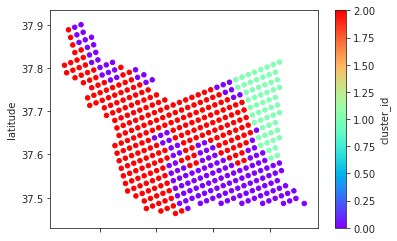

In [11]:
region = rpm._rpm_regions['Alameda']['clusters'].copy()
region.plot.scatter(x='longitude', y='latitude', c='cluster_id', cmap='rainbow')
plt.show()

In [12]:
out_file = '/lustre/eaglefs/scratch/gbuster/rev/rpm/rpm_clusters.csv'
rpm.save_clusters(out_file)